<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/YOLO_Drone_Detection_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d muki2003/yolo-drone-detection-dataset -p /content/
!unzip /content/yolo-drone-detection-dataset.zip -d /content/drone_dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset
License(s): other
 73% 263M/359M [00:00<00:00, 1.38GB/s]
100% 359M/359M [00:00<00:00, 1.37GB/s]
Archive:  /content/yolo-drone-detection-dataset.zip
  inflating: /content/drone_dataset/drone_dataset/data.yaml  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_031.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_032.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_035.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_036.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_037.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_038.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_039.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/images/pic_042.jpg  
  inflating: /content/drone_dataset/drone_dataset/train/i

In [ ]:

import os
import shutil

# Define source and destination directories
source_dir = "/content/drone_dataset"
destination_dir_train_images = "/content/drone_dataset/drone_dataset/train/images"
destination_dir_valid_images = "/content/drone_dataset/drone_dataset/valid/images"
destination_dir_train_labels = "/content/drone_dataset/drone_dataset/train/labels"
destination_dir_valid_labels = "/content/drone_dataset/drone_dataset/valid/labels"


# Create necessary directories if they don't exist
os.makedirs(destination_dir_train_images, exist_ok=True)
os.makedirs(destination_dir_valid_images, exist_ok=True)
os.makedirs(destination_dir_train_labels, exist_ok=True)
os.makedirs(destination_dir_valid_labels, exist_ok=True)

# Iterate through files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
        source_path = os.path.join(source_dir, filename)
        # Split the filename to get the base name (without extension)
        base_name, _ = os.path.splitext(filename)

        # Define destination based on filename (you might need a better split logic)
        if int(base_name) < 1600:
            destination_path_image = os.path.join(destination_dir_train_images, filename)
            destination_path_label = os.path.join(destination_dir_train_labels, base_name + ".txt")

        else:
            destination_path_image = os.path.join(destination_dir_valid_images, filename)
            destination_path_label = os.path.join(destination_dir_valid_labels, base_name + ".txt")

        # Copy images
        shutil.copy2(source_path, destination_path_image)

        # Copy corresponding label files (assuming label files have the same base name)
        label_filename = base_name + ".txt"
        label_source_path = os.path.join("/content/drone_dataset/labels", label_filename)
        if os.path.exists(label_source_path):
          shutil.copy2(label_source_path, destination_path_label)
        else:
          print(f"Label file not found for {filename}")

In [ ]:

import os

# Check the number of images in train and validation directories
print("Number of training images:", len(os.listdir(destination_dir_train_images)))
print("Number of validation images:", len(os.listdir(destination_dir_valid_images)))

print("Number of training labels:", len(os.listdir(destination_dir_train_labels)))
print("Number of validation labels:", len(os.listdir(destination_dir_valid_labels)))

Number of training images: 1012
Number of validation images: 347
Number of training labels: 1012
Number of validation labels: 348


In [ ]:

from google.colab import files
import yaml

# Upload the YAML file
uploaded = files.upload()

# Get the filename of the uploaded YAML file
yaml_filename = list(uploaded.keys())[0]


Saving data.yaml to data.yaml


In [ ]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cud

In [ ]:
# Install required libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 133.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found exis

In [18]:

# Import necessary libraries
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO('yolov8x.pt')

# Train the model
results = model.train(data='/content/data.yaml', epochs=100, imgsz=1500,batch=8)

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1500, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning /content/drone_dataset/drone_dataset/train/labels.cache... 1012 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<?, ?it/s]

train: /content/drone_dataset/drone_dataset/train/images/pic_722.jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 498.8±263.0 MB/s, size: 339.9 KB)


val: Scanning /content/drone_dataset/drone_dataset/valid/labels.cache... 347 images, 0 backgrounds, 0 corrupt: 100%|██████████| 347/347 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 1504 train, 1504 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        39G       2.44      3.598      2.851          8       1504: 100%|██████████| 127/127 [01:13<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.73it/s]

                   all        347        369          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      38.4G      2.532      2.814      2.828          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369    0.00469      0.637     0.0263    0.00588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      38.4G      2.412      2.784      2.768          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369     0.0187        0.1     0.0058    0.00139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      38.5G      2.297      2.712      2.679         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.78it/s]

                   all        347        369     0.0551      0.198     0.0315    0.00711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      38.5G      2.209      2.631      2.589          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.78it/s]

                   all        347        369      0.145      0.388      0.102     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      38.5G      2.151      2.496      2.545         15       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369     0.0495      0.252     0.0289    0.00707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      38.5G      2.078      2.413      2.514         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.232       0.32      0.164     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      38.5G      2.085      2.358      2.436         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.81it/s]

                   all        347        369      0.231      0.317      0.174     0.0471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      38.3G      2.038      2.259      2.412         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.271       0.35      0.209      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      38.5G       1.99      2.195       2.37         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.327      0.268      0.239     0.0752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      38.5G      2.004      2.178      2.379         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.80it/s]

                   all        347        369      0.273      0.268      0.174     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      38.5G      1.914      2.044      2.319         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.441      0.369      0.345      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      38.5G      1.876      2.011      2.306          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.457      0.366      0.356      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      38.5G      1.827      1.954      2.244          7       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.387      0.466      0.362      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      38.5G      1.838      1.912      2.244         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.81it/s]

                   all        347        369      0.517      0.444      0.455      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      38.5G      1.803        1.9      2.224          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369       0.55      0.454      0.468      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      38.3G      1.806      1.873      2.231         18       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.81it/s]

                   all        347        369      0.585      0.493      0.512       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      38.5G      1.774      1.814      2.198         15       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.397       0.29      0.269     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      38.5G      1.793      1.815      2.209          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.499      0.474      0.467      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      38.5G      1.776      1.793      2.172          7       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.534      0.564      0.523      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      38.5G      1.783      1.737      2.177         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369        0.6      0.547      0.533      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      38.5G      1.742      1.707      2.159         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]

                   all        347        369      0.593      0.537      0.557      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      38.5G      1.727      1.729      2.157         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.513      0.526      0.525      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      38.5G      1.721       1.65      2.147         16       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]

                   all        347        369      0.507      0.512      0.508      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      38.3G      1.694      1.641      2.103         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.668      0.517      0.558      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      38.5G      1.718      1.619      2.131         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.549      0.539      0.541      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      38.5G      1.697      1.596      2.079         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369       0.56      0.515      0.529      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      38.5G      1.653      1.588      2.088          7       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.648      0.534      0.583      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      38.5G      1.694      1.575      2.054         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.643      0.606       0.63      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      38.5G      1.629      1.523      2.031         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.648      0.613      0.632      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      38.5G      1.635      1.535      2.042          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.622      0.625      0.631      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      38.5G      1.651      1.501      2.037         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.629      0.531      0.578      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      38.3G      1.636      1.488      2.017         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.617       0.61       0.63      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      38.5G      1.604      1.436      1.984         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.588      0.599      0.575      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      38.5G       1.61      1.395      1.994          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.562       0.61      0.554      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      38.5G      1.586      1.402      2.001         16       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.683      0.572      0.624      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      38.5G      1.584      1.366      1.988         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.707      0.627      0.687      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      38.5G      1.646      1.409      2.014         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.692      0.591      0.635       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      38.5G      1.557      1.387      1.952         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.663      0.601      0.626      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      38.5G       1.54      1.337       1.96          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.697       0.63      0.677      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      38.3G      1.547      1.298      1.962          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.623      0.659      0.621      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      38.5G      1.572      1.312      1.952         16       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]

                   all        347        369      0.738      0.619      0.685       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      38.5G      1.534      1.298      1.953          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]

                   all        347        369      0.672      0.626      0.656      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      38.5G      1.547      1.273      1.931          6       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.81it/s]

                   all        347        369      0.696       0.59      0.624       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      38.5G      1.492      1.274      1.907         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.754      0.577      0.666      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      38.5G      1.522      1.267      1.908         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.783      0.648      0.699      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      38.5G      1.484      1.229      1.891         16       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.787      0.659      0.696      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      38.5G      1.486      1.214      1.913         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369      0.737      0.645      0.694      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      38.3G      1.538      1.226       1.91         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369       0.71      0.644      0.697      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      38.5G      1.502      1.216      1.885          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369      0.656      0.669      0.667      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      38.5G      1.475      1.198      1.867         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.781      0.617      0.698      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      38.5G       1.47      1.184      1.885         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369       0.58      0.562      0.569      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      38.5G      1.488      1.122      1.864         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.695      0.612      0.658      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      38.5G      1.505       1.17      1.907          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369       0.78       0.65      0.731      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      38.5G      1.472      1.114      1.846         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369       0.74      0.617       0.68      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      38.5G      1.477      1.181      1.856          6       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369      0.758      0.642      0.706      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      38.3G      1.443      1.159       1.83         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369        0.7      0.678      0.703      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      38.5G      1.446      1.132       1.87          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.712      0.545      0.615      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      38.5G      1.428      1.104      1.837          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.752      0.556       0.62      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      38.5G       1.43      1.093      1.832         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.698       0.55      0.615      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      38.5G      1.414      1.094      1.788          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.713      0.659      0.695      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      38.5G      1.423      1.087      1.817         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369        0.8      0.519      0.636       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      38.5G      1.414      1.076      1.797         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.781       0.65      0.719      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      38.5G       1.41      1.056      1.803         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369      0.708      0.732      0.732      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      38.3G      1.399      1.071      1.802         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369      0.792      0.637      0.731      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      38.5G      1.391      1.044      1.778         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369      0.795      0.683      0.759      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      38.5G      1.369     0.9929      1.752         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.748       0.65      0.705      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      38.5G      1.431      1.027      1.778         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.688      0.718      0.718      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      38.5G      1.351     0.9965      1.768         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.774      0.661      0.727      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      38.5G      1.405      1.026      1.771         12       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.798      0.652      0.736      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      38.5G      1.359     0.9801      1.747          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.738      0.653        0.7      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      38.5G      1.379     0.9909      1.778         15       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369      0.794      0.701      0.765      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      38.3G      1.354      1.005      1.751          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369       0.76      0.653       0.71      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      38.5G      1.345       0.97      1.741         15       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.755      0.644      0.716      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      38.5G      1.372     0.9774      1.742         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.745      0.732      0.759      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      38.5G      1.355     0.9586      1.724         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.809      0.664       0.76      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      38.5G      1.345     0.9467      1.717          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.765      0.702      0.724      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      38.5G      1.306     0.9363      1.739         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.788      0.697      0.746      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      38.5G      1.317      0.938      1.704          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369      0.832      0.577      0.652      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      38.5G      1.345     0.9426      1.716         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369      0.765      0.696      0.745      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      38.3G       1.32     0.9294      1.695         10       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.729      0.707      0.739       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      38.5G      1.304     0.9195      1.731         16       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.83it/s]

                   all        347        369      0.776      0.705      0.771      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      38.5G      1.296     0.9141      1.691          7       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]

                   all        347        369      0.768      0.582      0.638      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      38.5G      1.279      0.885      1.688         14       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.89it/s]

                   all        347        369      0.798      0.716      0.769      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      38.5G      1.286     0.8912      1.673         19       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.829      0.699      0.779      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      38.5G      1.283     0.8864      1.689         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.811      0.734      0.788      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      38.5G      1.315      0.907      1.669          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.89it/s]

                   all        347        369      0.796       0.71      0.751        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      38.5G      1.298     0.9135      1.654         15       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.739      0.699      0.756      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      38.4G      1.307      0.883      1.679         11       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]

                   all        347        369      0.773      0.696      0.752       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      38.5G       1.25     0.8624      1.655         13       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.835      0.701      0.786       0.32


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      38.5G      1.656     0.7767      1.491          4       1504: 100%|██████████| 127/127 [01:12<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.81it/s]

                   all        347        369      0.813      0.732      0.807      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      38.5G      1.626     0.7233      1.456          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]

                   all        347        369      0.852      0.732      0.793      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      38.5G       1.63     0.7226      1.416          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.855      0.735      0.802      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      38.5G      1.625     0.7005      1.439          8       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]

                   all        347        369      0.906      0.702      0.801       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      38.5G      1.609     0.6768      1.423          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.89it/s]

                   all        347        369      0.873      0.721      0.805      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      38.5G      1.597     0.6887       1.42          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369      0.889      0.732      0.809      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      38.4G      1.604     0.6823      1.424          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]

                   all        347        369      0.851      0.727      0.795      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      38.5G      1.568     0.6678      1.391          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.86it/s]

                   all        347        369      0.841      0.726      0.796       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      38.5G        1.6     0.6824      1.373          4       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.89it/s]

                   all        347        369      0.853      0.732      0.804       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      38.5G      1.609     0.6878      1.375          9       1504: 100%|██████████| 127/127 [01:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.89it/s]

                   all        347        369      0.847       0.74      0.808      0.345



100 epochs completed in 2.194 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 137.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 137.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]


                   all        347        369      0.852       0.74      0.807      0.344
Speed: 0.4ms preprocess, 12.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train3


Saving 1.webp to 1 (1).webp

image 1/1 /content/1 (1).webp: 544x800 1 drone, 15.1ms
Speed: 3.3ms preprocess, 15.1ms inference, 2.3ms postprocess per image at shape (1, 3, 544, 800)


array([[[69, 75, 52],
        [65, 71, 48],
        [58, 64, 41],
        ...,
        [36, 32, 13],
        [40, 36, 17],
        [38, 34, 15]],

       [[64, 70, 46],
        [62, 68, 43],
        [58, 64, 38],
        ...,
        [38, 34, 15],
        [40, 36, 17],
        [41, 37, 18]],

       [[65, 71, 43],
        [64, 70, 43],
        [59, 66, 38],
        ...,
        [40, 35, 16],
        [40, 36, 17],
        [42, 37, 18]],

       ...,

       [[17, 16,  8],
        [18, 19, 10],
        [18, 21, 12],
        ...,
        [18, 26, 15],
        [17, 25, 14],
        [20, 28, 16]],

       [[17, 19, 10],
        [17, 20, 11],
        [18, 22, 13],
        ...,
        [15, 23, 12],
        [15, 23, 11],
        [18, 26, 15]],

       [[14, 17,  8],
        [15, 19, 11],
        [18, 24, 15],
        ...,
        [16, 24, 13],
        [14, 22, 11],
        [17, 25, 14]]], dtype=uint8)
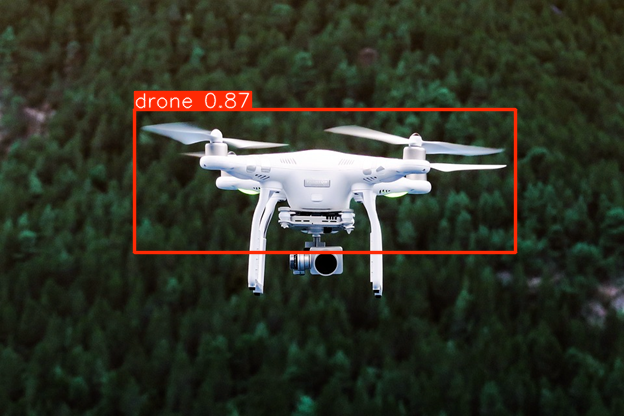

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8686], device='cuda:0')
data: tensor([[134.7132, 109.0578, 515.0090, 252.8020,   0.8686,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (416, 624)
shape: torch.Size([1, 6])
xywh: tensor([[324.8611, 180.9299, 380.2959, 143.7442]], device='cuda:0')
xywhn: tensor([[0.5206, 0.4349, 0.6094, 0.3455]], device='cuda:0')
xyxy: tensor([[134.7132, 109.0578, 515.0090, 252.8020]], device='cuda:0')
xyxyn: tensor([[0.2159, 0.2622, 0.8253, 0.6077]], device='cuda:0')

In [19]:
from google.colab import files
from IPython.display import Image, display
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

# Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
image_filename = list(uploaded.keys())[0]

# Perform inference on the uploaded image
results = model(image_filename)

# Display the image with detections
display(results[0].plot())  # Directly display the plotted image using display

# Print the results (bounding boxes, confidence scores, class names)
results[0].boxes

Saving 24-017-Sunset_Drone.jpg to 24-017-Sunset_Drone (3).jpg

image 1/1 /content/24-017-Sunset_Drone (3).jpg: 480x800 1 drone, 14.6ms
Speed: 3.0ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


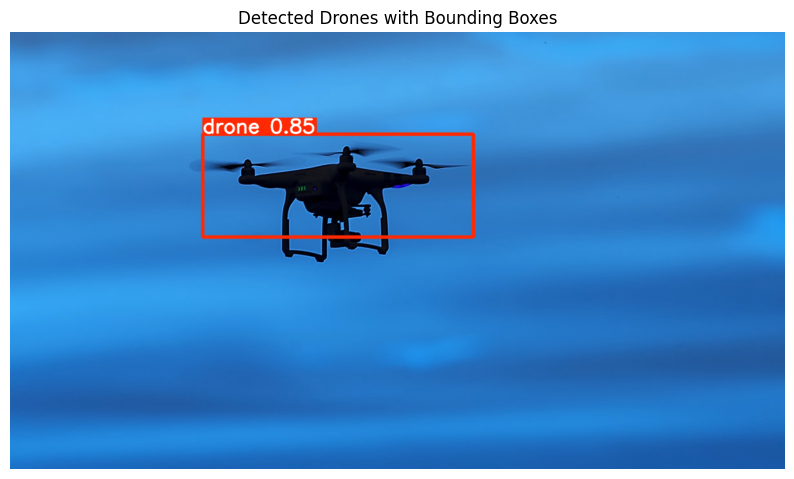

In [20]:
from IPython.display import Image, display
import cv2
import matplotlib.pyplot as plt

model = YOLO('/content/runs/detect/train/weights/best.pt')

uploaded = files.upload()


image_filename = list(uploaded.keys())[0]

results = model(image_filename)

annotated_frame = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title("Detected Drones with Bounding Boxes")
plt.show()


Saving Keeley-PRO-4-25-Hero.webp to Keeley-PRO-4-25-Hero (2).webp

image 1/1 /content/Keeley-PRO-4-25-Hero (2).webp: 352x800 6 drones, 16.0ms
Speed: 3.1ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 800)


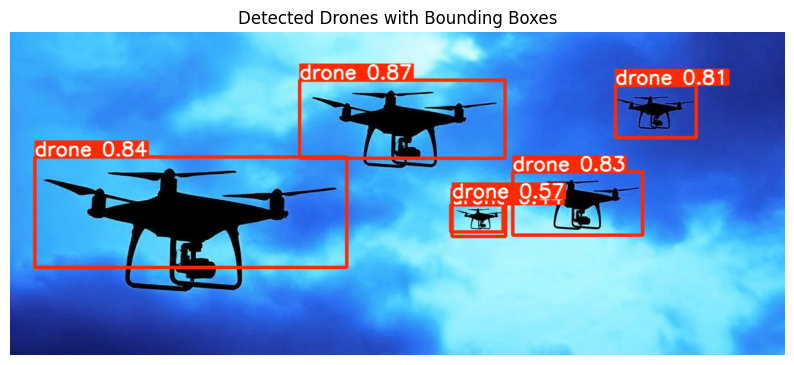

In [21]:
uploaded = files.upload()


image_filename = list(uploaded.keys())[0]

results = model(image_filename)

annotated_frame = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title("Detected Drones with Bounding Boxes")
plt.show()


Saving Screenshot_2-68-1.jpg to Screenshot_2-68-1 (2).jpg

image 1/1 /content/Screenshot_2-68-1 (2).jpg: 480x800 6 drones, 16.1ms
Speed: 3.7ms preprocess, 16.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


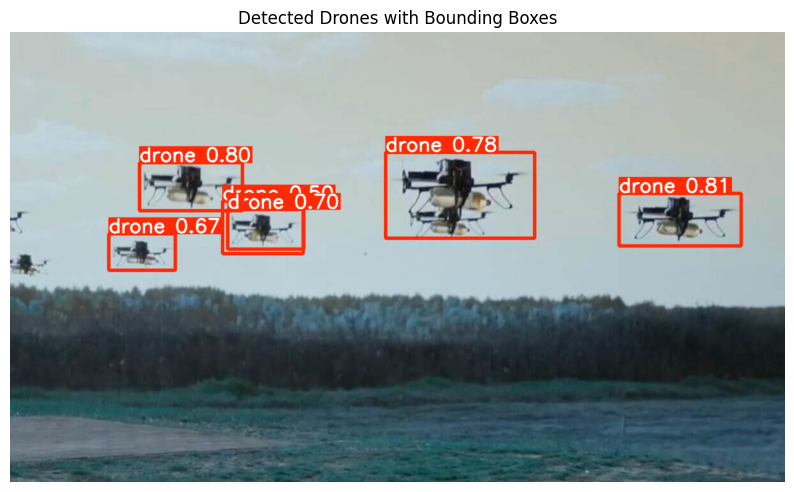

In [22]:
uploaded = files.upload()


image_filename = list(uploaded.keys())[0]

results = model(image_filename)

annotated_frame = results[0].plot()

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.title("Detected Drones with Bounding Boxes")
plt.show()
